In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
ratings = pd.read_csv('r.csv')
ratings = ratings[['user_id','product_id','rating']]
ratings

,user_id,product_id,rating
0,35941,45,3.8
1,35941,77,3.9
2,35941,117,3.1
3,36449,75,3.6
4,36449,117,4.0
...,...,...,...
45711,94905,79,1.0
45712,123616,100,1.0
45713,94905,80,1.0
45714,94905,755,1.0


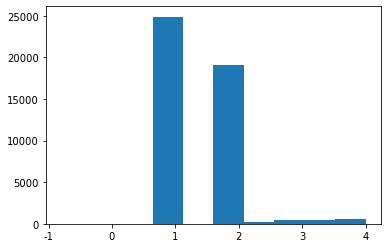

In [112]:
plt.hist(ratings['rating'], bins = 10)
plt.show()

In [113]:
ratings['rating'].describe()

count    45716.000000
mean         1.499713
std          0.603714
min         -0.800000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: rating, dtype: float64

## product 당 평점 개수

In [114]:
ratings.groupby('product_id')['rating'].count().reset_index().sort_values('rating', ascending=False)

,product_id,rating
204,315,1093
291,481,784
5,45,705
136,192,625
119,170,624
...,...,...
837,1136,1
806,1102,1
793,1082,1
792,1080,1


In [115]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

data = ratings.groupby('product_id')['rating'].count()
#.clip(upper=100)

trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 500,
                                  size = 2))

layout = go.Layout(title = 'Distribution Of Number of Ratings Per Product',
                   xaxis = dict(title = 'Number of Ratings Per Product'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.01)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## 사용자 별 평점 개수

In [116]:
ratings.groupby('user_id')['rating'].count().reset_index().sort_values('rating', ascending=False)

,user_id,rating
4814,70666,165
4570,65493,118
5280,77819,115
269,10933,102
1619,22678,80
...,...,...
4413,62446,1
4411,62389,1
4410,62377,1
4408,62346,1


In [117]:
data = ratings.groupby('user_id')['rating'].count()
#.clip(upper=50)

trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0,
                                  end = 170,
                                  size = 2))

layout = go.Layout(title = 'Distribution Of Number of Ratings Per User',
                   xaxis = dict(title = 'Ratings Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.01)


fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## 전처리

minmax scailing 하면 (정규화하기 전)0값도 의미있을 것이라 판단하여 0을 제거하지 않았음

In [118]:
## 0 제거 
'''
rating_0=ratings[ratings['rating']==0].index
ratings=ratings.drop(rating_0)
ratings['rating']=ratings['rating']
ratings['rating'].value_counts()
'''

"\nrating_0=ratings[ratings['rating']==0].index\nratings=ratings.drop(rating_0)\nratings['rating']=ratings['rating']\nratings['rating'].value_counts()\n"

In [119]:
## 0 제거 X
ratings['rating'].value_counts()

 1.000000    24900
 2.000000    19079
 4.000000      274
 3.500000      115
 3.000000      114
 3.200000      113
 2.800000      101
 3.600000      101
 3.400000       99
 3.800000       94
 2.600000       86
 2.400000       73
 3.300000       63
 3.100000       63
 3.700000       61
 2.700000       49
 2.900000       48
 3.900000       48
 2.500000       47
 2.200000       38
 2.100000       32
 2.300000       31
 1.900000       16
 1.800000       10
 1.700000        8
 1.500000        7
 1.200000        5
 1.600000        5
 3.666667        5
 1.300000        4
 0.000000        4
 0.500000        4
 1.400000        3
 1.100000        2
 2.666667        2
 3.333333        2
-0.100000        1
-0.600000        1
-0.800000        1
-0.500000        1
 0.700000        1
-0.200000        1
 3.833333        1
 0.900000        1
 0.800000        1
 0.100000        1
Name: rating, dtype: int64

### MinMaxScaler

0~1 값으로 minmax정규화

In [120]:
from sklearn.preprocessing import MinMaxScaler

ratings_minmax = ratings.copy()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(ratings_minmax['rating'].values.reshape(-1,1))
ratings_minmax.insert(0, 'scaled', scaled)
ratings_minmax.drop(['rating'], axis=1, inplace=True)
ratings_minmax = ratings_minmax[["user_id",'product_id','scaled']]
ratings_minmax.rename(columns = {'scaled':'rating'}, inplace=True)
ratings_minmax

,user_id,product_id,rating
0,35941,45,0.958333
1,35941,77,0.979167
2,35941,117,0.812500
3,36449,75,0.916667
4,36449,117,1.000000
...,...,...,...
45711,94905,79,0.375000
45712,123616,100,0.375000
45713,94905,80,0.375000
45714,94905,755,0.375000


In [147]:
ratings_minmax['rating'].describe()

count    45716.000000
mean         0.479107
std          0.125774
min          0.000000
25%          0.375000
50%          0.375000
75%          0.583333
max          1.000000
Name: rating, dtype: float64

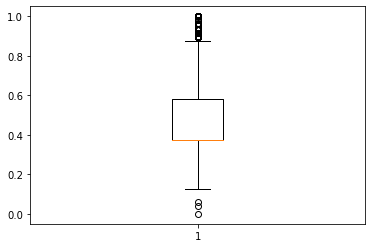

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]
%matplotlib inline

plt.boxplot(ratings_minmax['rating'])
plt.show()

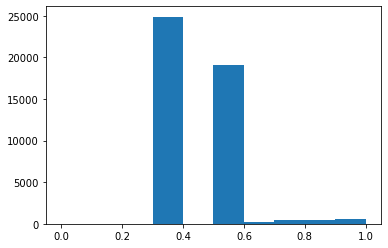

In [122]:
plt.hist(ratings_minmax['rating'], bins = 10)
plt.show()

### StandardScaler

-3.8 ~ 4.14 값으로 standard 정규화

In [123]:
from sklearn.preprocessing import StandardScaler

ratings_std = ratings.copy()
scaler = StandardScaler()
scaled = scaler.fit_transform(ratings_std['rating'].values.reshape(-1,1))
ratings_std.insert(0, 'scaled', scaled)
ratings_std.drop(['rating'], axis=1, inplace=True)
ratings_std = ratings_std[["user_id",'product_id','scaled']]
ratings_std.rename(columns = {'scaled':'rating'}, inplace=True)
ratings_std

,user_id,product_id,rating
0,35941,45,3.810271
1,35941,77,3.975915
2,35941,117,2.650768
3,36449,75,3.478985
4,36449,117,4.141558
...,...,...,...
45711,94905,79,-0.827741
45712,123616,100,-0.827741
45713,94905,80,-0.827741
45714,94905,755,-0.827741


In [148]:
ratings_std['rating'].describe()

count    4.571600e+04
mean    -3.879418e-16
std      1.000011e+00
min     -3.809320e+00
25%     -8.277406e-01
50%     -8.277406e-01
75%      8.286923e-01
max      4.141558e+00
Name: rating, dtype: float64

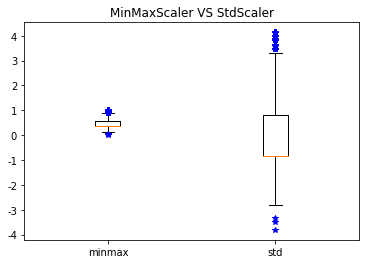

In [149]:
fig, ax = plt.subplots()
ax.boxplot([ratings_minmax['rating'], ratings_std['rating']], sym="b*")
plt.title('MinMaxScaler VS StdScaler')
plt.xticks([1, 2], ['minmax', 'std'])
plt.show()

minmax 정규화와 standard 정규화를 box plot으로 그려보니 경향이 똑같음을 알 수 있다.
--> 더 간단한 minmax 정규화 사용

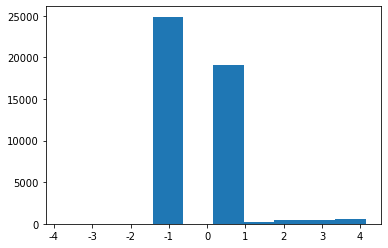

In [125]:
plt.hist(ratings_std['rating'], bins = 10)
plt.show()

### model fit

In [126]:
from surprise import Dataset 
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score,classification_report, f1_score

In [127]:
reader = Reader(rating_scale=(0.0, 1.0))

data = Dataset.load_from_df(ratings_minmax[['user_id','product_id','rating']],
                           reader=reader)

#### RMSE

In [128]:
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBasic, KNNBaseline, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from surprise.model_selection import cross_validate

benchmark = []
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    
    ## cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
   
#pd.DataFrame(benchmark).set_index('Algorithm')
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Don

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,0.104309,0.030097,0.014178
SVDpp,0.105554,3.437029,0.063926
KNNBaseline,0.105665,1.680979,0.606719
KNNWithMeans,0.112247,1.527756,0.566071
KNNWithZScore,0.112822,1.608624,0.591501
KNNBasic,0.115589,1.597119,0.571845
SlopeOne,0.118162,0.063626,0.056856
NMF,0.119307,1.386940,0.030544
SVD,0.120558,1.041271,0.022495


#### MAE

In [129]:
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBasic, KNNBaseline, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from surprise.model_selection import cross_validate

benchmark = []
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    
    ## cross validation
    results = cross_validate(algorithm, data, measures=['MAE'], cv=5, verbose=False)
    
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
   
#pd.DataFrame(benchmark).set_index('Algorithm')
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_mae')

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Don

,test_mae,fit_time,test_time
Algorithm,,,
KNNBaseline,0.077987,1.514563,0.622513
SVDpp,0.081224,3.459918,0.063221
BaselineOnly,0.083260,0.030940,0.031630
KNNWithMeans,0.084036,1.497235,0.568377
KNNWithZScore,0.084503,1.598785,0.611801
SlopeOne,0.085555,0.063997,0.044746
KNNBasic,0.089047,1.501885,0.558117
SVD,0.092566,1.063664,0.031438
NMF,0.095551,1.422626,0.030820


RMSE와 MAE 값을 비교한 결과 대체로 SVDpp, KNNWithMeans의 성능이 좋음을 알 수 있음

### NMF

In [130]:
from surprise import NMF

In [103]:
reader = Reader(rating_scale=(0.0, 1.0))

data = Dataset.load_from_df(ratings_minmax[['user_id','product_id','rating']],
                           reader=reader)

train, test = train_test_split(data, test_size=0.25, random_state=42)

In [145]:
param_distributions  = {'n_factors': list(range(10,20,2)),'reg_pu': np.arange(0.01,0.2,0.01),'reg_qi': np.arange(0.01,0.2,0.01), 'n_epochs' : list(range(1,51))}
rs = RandomizedSearchCV(NMF, param_distributions, measures=['rmse'], return_train_measures = True, cv = 5, n_iter = 10)
rs.fit(data)
print(rs.best_score['rmse'])
print(rs.best_params['rmse'])

0.11879531518571976
{'n_factors': 14, 'reg_pu': 0.14, 'reg_qi': 0.02, 'n_epochs': 26}


In [146]:
tuned_nmf_model = NMF(n_factors=14, reg_pu=0.14, reg_qi= 0.02, n_epochs=26)
tuned_nmf_model.fit(train)
train_predictions = tuned_nmf_model.test(train.build_testset())
test_predictions = tuned_nmf_model.test(test)
print("RMSE on training data : ", accuracy.rmse(train_predictions, verbose = False))
print("RMSE on test data: ", accuracy.rmse(test_predictions, verbose = False))

print("MAE on training data : ", accuracy.mae(train_predictions, verbose = False))
print("MAE on test data: ", accuracy.mae(test_predictions, verbose = False))

RMSE on training data :  0.08703447204958878
RMSE on test data:  0.12006515644915897
MAE on training data :  0.0697125264778202
MAE on test data:  0.09619258730906916


NMF 모델에 파라미터를 다양하게 넣어 최적의 파라미터 찾음 <br >
각 파라미터의 default value<br>
n_factors : 15 / 
reg_pu : 0.06 / 
reg_qi : 0.06 / 
n_epochs : 50